Нейронные сети для прогнозирования Вариант 2
===========

In [3]:
# Импорт библиотек
import numpy as np
import pandas as pd

# Импорт matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [4]:
# Задаем рабочую папку

import os
# c:/aaa/_R/_R3/Ames_dataset/
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_05_regression")


### Прогнозирование временных рядов.

In [5]:
# Импорт обучающей выборки
ser_g = pd.read_csv('series_g.csv', sep=';', header=0)

ser_g.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [6]:
#  Знакомимся с данными
ser_g.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [7]:
#  Знакомимся с данными
ser_g.shape

(144, 2)

In [8]:
#  С данными все хорошо?
ser_g.tail()

,date,series_g
139,AUG 1960,606
140,SEP 1960,508
141,OCT 1960,461
142,NOV 1960,390
143,DEC 1960,432


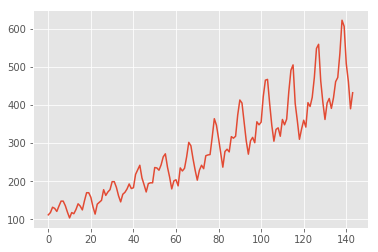

In [9]:
#  График, чтобы ответить на 4 вопроса
ser_g.iloc[:,1].plot()


Вывод: будем строить модель линейной регрессии для прогнозирования логарифма от объёма перевозок. То есть
$$\log y_i = нейронная сеть(t_i , регрессоры) + \varepsilon_i,$$
где $y_i$ -- объём перевозок, $t_i$ -- порядковый номер месяца, регрессоры - дополнительные переменные, влияющие на прогноз, $\varepsilon_i$ -- случайный шум.

Создадим регрессионную переменную ```month_num``` -- порядковый номер пары (месяц, год). И прологарифмируем временной ряд.

In [11]:
#  Будем прогнозировать логарифм
ser_g['log_y'] = np.log10(ser_g['series_g'])
#  Переменная время
ser_g['month_num'] = range(1, len(ser_g) + 1)



In [13]:
#  Все хорошо?
ser_g.head()

,date,series_g,log_y,month_num
0,JAN 1949,112,2.049218,1
1,FEB 1949,118,2.071882,2
2,MAR 1949,132,2.120574,3
3,APR 1949,129,2.110590,4
4,MAY 1949,121,2.082785,5


In [14]:
ser_g_2 = ser_g.drop(columns=["date", "series_g"])

In [16]:
#  Все хорошо?
ser_g_2.head()

,log_y,month_num
0,2.049218,1
1,2.071882,2
2,2.120574,3
3,2.110590,4
4,2.082785,5


Создадим новые переменные - индикаторы месяцев

In [17]:
ser_g_2["m01"] = [1,0,0,0,0,0,0,0,0,0,0,0]*12
ser_g_2["m02"] = [0,1,0,0,0,0,0,0,0,0,0,0]*12
ser_g_2["m03"] = [0,0,1,0,0,0,0,0,0,0,0,0]*12
ser_g_2["m04"] = [0,0,0,1,0,0,0,0,0,0,0,0]*12
ser_g_2["m05"] = [0,0,0,0,1,0,0,0,0,0,0,0]*12
ser_g_2["m06"] = [0,0,0,0,0,1,0,0,0,0,0,0]*12
ser_g_2["m07"] = [0,0,0,0,0,0,1,0,0,0,0,0]*12
ser_g_2["m08"] = [0,0,0,0,0,0,0,1,0,0,0,0]*12
ser_g_2["m09"] = [0,0,0,0,0,0,0,0,1,0,0,0]*12
ser_g_2["m10"] = [0,0,0,0,0,0,0,0,0,1,0,0]*12
ser_g_2["m11"] = [0,0,0,0,0,0,0,0,0,0,1,0]*12
ser_g_2["m12"] = [0,0,0,0,0,0,0,0,0,0,0,1]*12


In [18]:
#  Все хорошо?
ser_g_2.head(14)

,log_y,month_num,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,2.049218,1,1,0,0,0,0,0,0,0,0,0,0,0
1,2.071882,2,0,1,0,0,0,0,0,0,0,0,0,0
2,2.120574,3,0,0,1,0,0,0,0,0,0,0,0,0
3,2.110590,4,0,0,0,1,0,0,0,0,0,0,0,0
4,2.082785,5,0,0,0,0,1,0,0,0,0,0,0,0
5,2.130334,6,0,0,0,0,0,1,0,0,0,0,0,0
6,2.170262,7,0,0,0,0,0,0,1,0,0,0,0,0
7,2.170262,8,0,0,0,0,0,0,0,1,0,0,0,0
8,2.133539,9,0,0,0,0,0,0,0,0,1,0,0,0
9,2.075547,10,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
#  предикторы и отклик разделяем

#  Создаем матрицу (столбец) откликов.
y = ser_g_2['log_y']

#  Создаем матрицу предикторов.
X = ser_g_2.drop(columns=["log_y"])

In [20]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:120]
y_train = y[:120]
X_test  = X[120:]
y_test  = y[120:]

In [21]:
#  Все хорошо?
print(ser_g_2.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(144, 14)
(120, 13)
(120,)
(24, 13)
(24,)


In [22]:
#  Все хорошо?
print(X_train.head(5))

   month_num  m01  m02  m03  m04  m05  m06  m07  m08  m09  m10  m11  m12
0          1    1    0    0    0    0    0    0    0    0    0    0    0
1          2    0    1    0    0    0    0    0    0    0    0    0    0
2          3    0    0    1    0    0    0    0    0    0    0    0    0
3          4    0    0    0    1    0    0    0    0    0    0    0    0
4          5    0    0    0    0    1    0    0    0    0    0    0    0


In [23]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [24]:
from keras.models import Sequential
from keras.layers import Dense

from keras import optimizers
from keras import initializers

C:\Users\USER\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
#  Обучение нейронной сети 

#  init_2 = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=12346)
#  init_3 = initializers.Constant(value = 1e-3)


# Creating a model
#  model = Sequential()
#  model.add(Dense(8, input_dim=12, activation='relu', kernel_initializer=init_2, bias_initializer=init_3))
#  model.add(Dense(1, activation='linear', kernel_initializer=init_2, bias_initializer=init_3))

model = Sequential()
model.add(Dense(8, input_dim=13, activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))

model.add(Dense(1, activation='linear'))

# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])


# Training a model
# model.fit(X_train, y_train, epochs=300, batch_size=7)
model.fit(X_train, y_train, epochs=300, batch_size=1)



Epoch 1/300
120/120 [==============================] - 1s 5ms/step - loss: 7.3318 - mean_absolute_percentage_error: 113.6646
Epoch 2/300
120/120 [==============================] - 0s 1ms/step - loss: 2.8779 - mean_absolute_percentage_error: 70.8865
Epoch 3/300
120/120 [==============================] - 0s 1ms/step - loss: 1.0045 - mean_absolute_percentage_error: 40.9779
Epoch 4/300
120/120 [==============================] - 0s 1ms/step - loss: 0.2676 - mean_absolute_percentage_error: 19.8580
Epoch 5/300
120/120 [==============================] - 0s 1ms/step - loss: 0.0649 - mean_absolute_percentage_error: 8.3095
Epoch 6/300
120/120 [==============================] - 0s 1ms/step - loss: 0.0300 - mean_absolute_percentage_error: 6.0159
Epoch 7/300
120/120 [==============================] - 0s 1ms/step - loss: 0.0255 - mean_absolute_percentage_error: 5.7439
Epoch 8/300
120/120 [==============================] - 0s 1ms/step - loss: 0.0249 - mean_absolute_percentage_error: 5.6921
Epoch 9/300

120/120 [==============================] - 0s 2ms/step - loss: 5.3086e-04 - mean_absolute_percentage_error: 0.7589
Epoch 130/300
120/120 [==============================] - 0s 2ms/step - loss: 7.1222e-04 - mean_absolute_percentage_error: 0.8663
Epoch 131/300
120/120 [==============================] - 0s 2ms/step - loss: 4.5935e-04 - mean_absolute_percentage_error: 0.7171
Epoch 132/300
120/120 [==============================] - 0s 2ms/step - loss: 4.9550e-04 - mean_absolute_percentage_error: 0.7750
Epoch 133/300
120/120 [==============================] - 0s 1ms/step - loss: 5.3071e-04 - mean_absolute_percentage_error: 0.7722
Epoch 134/300
120/120 [==============================] - 0s 1ms/step - loss: 5.1383e-04 - mean_absolute_percentage_error: 0.7582
Epoch 135/300
120/120 [==============================] - 0s 1ms/step - loss: 5.5755e-04 - mean_absolute_percentage_error: 0.7905
Epoch 136/300
120/120 [==============================] - 0s 1ms/step - loss: 5.8000e-04 - mean_absolute_percent

120/120 [==============================] - 0s 2ms/step - loss: 5.6747e-04 - mean_absolute_percentage_error: 0.7912
Epoch 256/300
120/120 [==============================] - 0s 1ms/step - loss: 4.5352e-04 - mean_absolute_percentage_error: 0.7171
Epoch 257/300
120/120 [==============================] - 0s 2ms/step - loss: 6.2243e-04 - mean_absolute_percentage_error: 0.8334
Epoch 258/300
120/120 [==============================] - 0s 1ms/step - loss: 4.6313e-04 - mean_absolute_percentage_error: 0.7130
Epoch 259/300
120/120 [==============================] - 0s 1ms/step - loss: 4.9470e-04 - mean_absolute_percentage_error: 0.7346
Epoch 260/300
120/120 [==============================] - 0s 1ms/step - loss: 4.1153e-04 - mean_absolute_percentage_error: 0.6491
Epoch 261/300
120/120 [==============================] - 0s 1ms/step - loss: 5.7810e-04 - mean_absolute_percentage_error: 0.7708
Epoch 262/300
120/120 [==============================] - 0s 1ms/step - loss: 4.3145e-04 - mean_absolute_percent

In [26]:
# оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

24/24 [==============================] - 0s 3ms/step

MAPE: 0.70%


In [27]:
# Вычисляем прогноз
predictions = model.predict(X_test)
# round predictions
# rounded = [round(x[0]) for x in predictions]
# print(rounded)

In [28]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [30]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(predictions_train.shape)
print(predictions.shape)


(120, 13)
(120,)
(24, 13)
(24,)
(120, 1)
(24, 1)


In [34]:
predictions_train2 = predictions_train[:,0]
predictions2 = predictions[:,0]


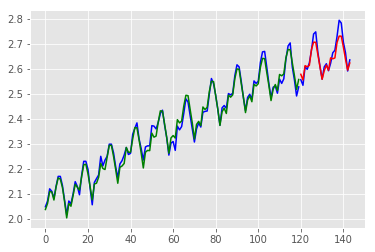

In [39]:
#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)

x2 = np.arange(0, 120, 1)

x3 = np.arange(120, 144, 1)


plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train2, color='green')

plt.plot(x3, y_test, color='blue')

plt.plot(x3, predictions2, color='red')



Все, что ниже - остатки скрипта, который переделывался, чтобы создать рассматриваемый скрипт

In [13]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,2.099793
1,month_num,0.004373
2,m01,-0.046979
3,m02,-0.056557
4,m04,-0.013580
5,m05,-0.014610
6,m06,0.038437
7,m07,0.083579
8,m08,0.079542
9,m09,0.016728


In [16]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef

In [17]:
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,2.099793,0.000000e+00
1,month_num,0.004373,0.000000e+00
2,m01,-0.046979,1.487224e-05
3,m02,-0.056557,2.717139e-07
4,m04,-0.013580,1.969117e-01
5,m05,-0.014610,1.652501e-01
6,m06,0.038437,3.426562e-04
7,m07,0.083579,4.376499e-13
8,m08,0.079542,3.735678e-12
9,m09,0.016728,1.126285e-01


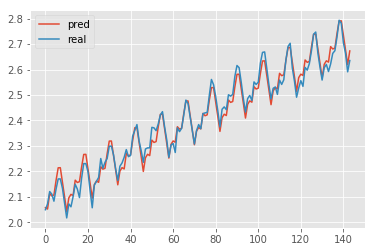

In [18]:
#  Сравним подгонку и ряд

pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

In [19]:
pred.head(14)

,pred,real
0,2.057187,2.049218
1,2.051982,2.071882
2,2.112912,2.120574
3,2.103705,2.110590
4,2.107047,2.082785
5,2.164467,2.130334
6,2.213982,2.170262
7,2.214318,2.170262
8,2.155877,2.133539
9,2.100248,2.075547


In [20]:
#  Готовим маторицу для вычисления прогнозов
#  Сначала время
df_3= pd.DataFrame()

df_3['month_num'] = range(145, 157)


In [21]:
df_3.head()

,month_num
0,145
1,146
2,147
3,148
4,149


In [24]:
#  Добавляем индикаторы месяцев. Базового месяца снова не должно быть
df_3["m01"] = [1,0,0,0,0,0,0,0,0,0,0,0]
df_3["m02"] = [0,1,0,0,0,0,0,0,0,0,0,0]
# df_3["m03"] = [0,0,1,0,0,0,0,0,0,0,0,0]
df_3["m04"] = [0,0,0,1,0,0,0,0,0,0,0,0]
df_3["m05"] = [0,0,0,0,1,0,0,0,0,0,0,0]
df_3["m06"] = [0,0,0,0,0,1,0,0,0,0,0,0]
df_3["m07"] = [0,0,0,0,0,0,1,0,0,0,0,0]
df_3["m08"] = [0,0,0,0,0,0,0,1,0,0,0,0]
df_3["m09"] = [0,0,0,0,0,0,0,0,1,0,0,0]
df_3["m10"] = [0,0,0,0,0,0,0,0,0,1,0,0]
df_3["m11"] = [0,0,0,0,0,0,0,0,0,0,1,0]
df_3["m12"] = [0,0,0,0,0,0,0,0,0,0,0,1]


In [25]:
df_3.head()

,month_num,m01,m02,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,145,1,0,0,0,0,0,0,0,0,0,0
1,146,0,1,0,0,0,0,0,0,0,0,0
2,147,0,0,0,0,0,0,0,0,0,0,0
3,148,0,0,1,0,0,0,0,0,0,0,0
4,149,0,0,0,1,0,0,0,0,0,0,0


In [26]:
#  Прогноз для логарфмов
model.predict(df_3)


array([2.68687445, 2.68166899, 2.74259874, 2.73339167, 2.73673407,
       2.79415432, 2.84366872, 2.84400485, 2.78556367, 2.72993514,
       2.67189215, 2.72571592])

In [27]:
#  Прогноз для исходного ряда
y1 = 10**model.predict(df_3)

In [28]:
y1

array([486.26661075, 480.47300064, 552.83907946, 541.24222483,
       545.42378389, 622.52144837, 697.70000261, 698.24020769,
       610.32852858, 536.95159299, 469.77743581, 531.76030967])

In [30]:
#  матрица с подгонкой
pred['forecast'] = np.nan
pred.head()

,pred,real,forecast
0,2.057187,2.049218,NaN
1,2.051982,2.071882,NaN
2,2.112912,2.120574,NaN
3,2.103705,2.110590,NaN
4,2.107047,2.082785,NaN


In [31]:
#  матрица с прогнозом ()
#  порядок столбцов не важен. Имена столбцов важны - должны быть как выше

df_4 = pd.DataFrame(model.predict(df_3), columns=['forecast'])
df_4['real'] = np.nan
df_4['pred'] = np.nan
df_4.head()

,forecast,real,pred
0,2.686874,NaN,NaN
1,2.681669,NaN,NaN
2,2.742599,NaN,NaN
3,2.733392,NaN,NaN
4,2.736734,NaN,NaN


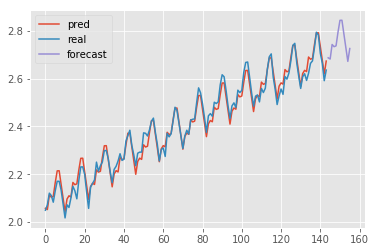

In [32]:
#  объединяем матрицы, задаем новые индексы
pred_1 = pd.concat(
    [pred, df_4],
    sort=False
).reset_index(drop=True)
pred_1.plot()

In [33]:
#  Возвращаемся к исходному ряду
pred_11 = 10**pred_1

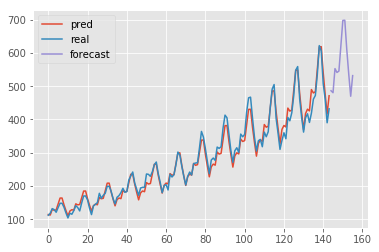

In [34]:
pred_11.plot()